In [1]:
"""
Cart Pole:
Observation:
0: Cart Position [-4.8, 4.8], with episode ending at [-2.4, 2.4]
1: Cart Velocity [-Inf, Inf]
2: Pole Angle [-0.418, 0.418] (in radians) with episode ending at [-0.2095, 0.2095]
3: Pole Angular Velocity [-Inf, Inf]

Env.Reset():
returns tuple:
0: observation
1: info

Env.Step():
returns tuple:
0: observation
1: reward
2: done
3: truncated
4: info

Notes:

- optimistic initialization helped explore the unseen actions
- with optmistic intialization, both reward functions performed similarly
- e-soft:
    - with 10000 steps, and epsilon 0.01 performs worse than optimistic initialization
        - no obvious differnce between epsilon soft with custom reward function (50-50 cart position : pole angle)
    - 6,000 steps, 5 trials averaged, 0.04 epsilon:
        - still performs worse than optimistic initially
        - custom reward function (80% pole angle - 20% cart position) may be overtaking default reward function it around 6000 steps?
    - 10,000 steps, 2 trials averaged, 0.04 epsilon
        - custom reword (80:20) results in much longer episode lengths        
- every visit vs first visit has no distiguishable differece in performance both in returns and 
- off policy MC-control - every visit 10000 episodes averaged over 2 runs
    - compared with on policy, they both obviously take time to learn but
    - assuming my implementation is right, off policy performs much worse for the same number of iterations. 
      this could be because it descards much more of each episode
    - it does run almost twice as quickly though



TODO: 
 - compare off policy with more episodes 
"""

'\nCart Pole:\nObservation:\n0: Cart Position [-4.8, 4.8], with episode ending at [-2.4, 2.4]\n1: Cart Velocity [-Inf, Inf]\n2: Pole Angle [-0.418, 0.418] (in radians) with episode ending at [-0.2095, 0.2095]\n3: Pole Angular Velocity [-Inf, Inf]\n\nEnv.Reset():\nreturns tuple:\n0: observation\n1: info\n\nEnv.Step():\nreturns tuple:\n0: observation\n1: reward\n2: done\n3: truncated\n4: info\n\nNotes:\n\n- optimistic initialization helped explore the unseen actions\n- with optmistic intialization, both reward functions performed similarly\n- e-soft:\n    - with 10000 steps, and epsilon 0.01 performs worse than optimistic initialization\n        - no obvious differnce between epsilon soft with custom reward function (50-50 cart position : pole angle)\n    - 6,000 steps, 5 trials averaged, 0.04 epsilon:\n        - still performs worse than optimistic initially\n        - custom reward function (80% pole angle - 20% cart position) may be overtaking default reward function it around 6000 st

In [2]:
from discretize import discretize
from collections import defaultdict
from custom_reward_funcs import *
from q_io import *
from tqdm import trange
from td_methods import *
import gym
from plots import *
from monte_carlo import run_iterations

In [3]:
epsilon = 0.04
num_episodes = 50000
num_steps =    5000000
gamma = 0.9
num_to_avg = 2
env = gym.make('CartPole-v1')

In [4]:
all_episode_lengths = []

for i in range(num_to_avg):
    Q, policy, episode_lengths = q_learning(
        env,
        num_steps=num_steps,
        gamma=gamma,
        epsilon=epsilon,
        step_size=0.5,
        # n=7,
        # reward_func=reward_vertical_central,
    )
    all_episode_lengths.append(episode_lengths)

q_learning_lengths = np.average(
    all_episode_lengths, axis=0
)

100%|██████████| 5000000/5000000 [04:31<00:00, 18447.11it/s]
/Users/dylanmarin/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:377: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


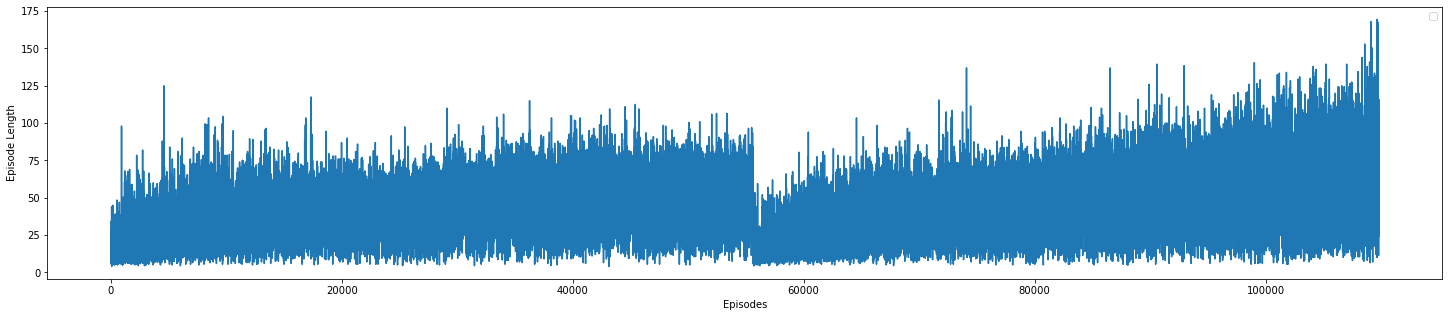

In [5]:
plot_single_iteration_returns(q_learning_lengths, y_label='Episode Length')

In [8]:
env = gym.make('CartPole-v1', render_mode='human')
run_iterations(env, Q, 10)

: 

In [7]:
# plot_returns([returns_neg_reward], ['negative reward'])